<a href="https://colab.research.google.com/github/Shlok1810/Spam_mail_Classifier/blob/main/Spam_Classifier_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud

## Importing Dataset


In [2]:
dataset = pd.read_csv('spam.csv')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], axis=1, inplace=True)

In [5]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset.shape

(5572, 2)

## Let's Visualised Spam Words

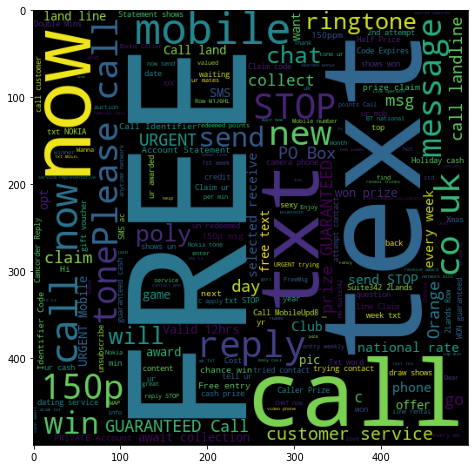

In [7]:
spam = ' '.join(list(dataset[dataset['v1']=='spam'] ['v2']))
wc = WordCloud(width = 500, height = 500).generate(spam)
plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.show()

## Let's Visualised Ham Words

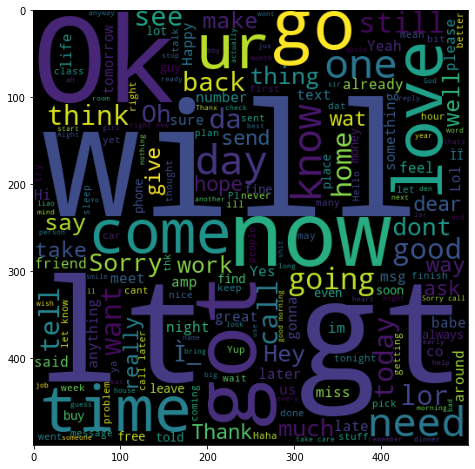

In [8]:
ham = ' '.join(list(dataset[dataset['v1']=='ham'] ['v2']))
wc = WordCloud(width = 500, height = 500).generate(ham)
plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.show()

## Encoding the labels

In [9]:
dataset['v1'] = dataset['v1'].apply(lambda x :1 if x=='spam' else 0)

In [10]:
dataset

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## Data Preprocessing

In [11]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tqdm import tqdm
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
!pip install autocorrect

In [13]:
from autocorrect import spell

In [14]:

corpus = []
for i in tqdm(range(0, 5572)):
  mail = re.sub('[^a-zA-Z]', ' ', dataset['v2'][i])
  mail = mail.lower()
  mail = mail.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  #all_stopwords.remove('not')
  mail = [ps.stem(word) for word in mail if not word in set(all_stopwords)]
  mail = ' '.join(mail)
  corpus.append(spell(mail))

  0%|          | 1/5572 [00:00<14:23,  6.45it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  0%|          | 7/5572 [00:00<10:32,  8.80it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  0%|          | 13/5572 [00:01<13:08,  7.05it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  0%|          | 20/5572 [00:02<15:03,  6.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|          | 32/5572 [00:02<08:39, 10.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|          | 39/5572 [00:03<07:25, 12.42it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|          | 42/5572 [00:03<07:33, 12.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|          | 50/5572 [00:03<05:54, 15.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|          | 56/5572 [00:04<05:24, 17.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|          | 60/5572 [00:04<05:06, 17.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  1%|▏         | 76/5572 [00:05<04:42, 19.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  2%|▏         | 92/5572 [00:05<03:30, 25.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  2%|▏         | 99/5572 [00:05<03:44, 24.36it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  2%|▏         | 104/5572 [00:06<06:33, 13.90it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  2%|▏         | 118/5572 [00:06<04:56, 18.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  2%|▏         | 127/5572 [00:07<04:31, 20.07it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  2%|▏         | 136/5572 [00:07<03:27, 26.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  3%|▎         | 143/5572 [00:07<02:57, 30.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  3%|▎         | 148/5572 [00:07<03:18, 27.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  3%|▎         | 157/5572 [00:08<05:21, 16.86it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  3%|▎         | 164/5572 [00:08<04:59, 18.04it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  3%|▎         | 180/5572 [00:09<04:05, 21.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  3%|▎         | 186/5572 [00:09<03:29, 25.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▎         | 199/5572 [00:09<03:33, 25.20it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▎         | 203/5572 [00:10<04:28, 19.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▍         | 222/5572 [00:10<03:38, 24.49it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  4%|▍         | 228/5572 [00:10<03:49, 23.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▍         | 233/5572 [00:11<03:48, 23.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▍         | 237/5572 [00:11<03:53, 22.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▍         | 245/5572 [00:11<04:40, 19.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  4%|▍         | 249/5572 [00:11<04:22, 20.28it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  5%|▍         | 252/5572 [00:12<07:22, 12.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  5%|▍         | 264/5572 [00:12<05:00, 17.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  5%|▍         | 268/5572 [00:12<04:31, 19.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  5%|▍         | 271/5572 [00:13<05:35, 15.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  5%|▌         | 296/5572 [00:13<03:37, 24.28it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  5%|▌         | 300/5572 [00:13<04:04, 21.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  6%|▌         | 309/5572 [00:14<03:29, 25.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  6%|▌         | 313/5572 [00:15<07:31, 11.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  6%|▌         | 316/5572 [00:15<06:11, 14.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  6%|▌         | 345/5572 [00:15<03:30, 24.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  6%|▋         | 351/5572 [00:15<03:53, 22.36it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  6%|▋         | 356/5572 [00:16<05:55, 14.68it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 363/5572 [00:16<05:41, 15.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 367/5572 [00:17<07:05, 12.22it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 372/5572 [00:17<06:31, 13.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 379/5572 [00:18<05:24, 16.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 382/5572 [00:18<04:54, 17.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 385/5572 [00:18<06:17, 13.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 389/5572 [00:18<06:30, 13.28it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 402/5572 [00:19<05:20, 16.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 409/5572 [00:19<04:30, 19.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  7%|▋         | 416/5572 [00:20<03:57, 21.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 419/5572 [00:20<04:31, 18.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 425/5572 [00:20<05:04, 16.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 429/5572 [00:20<04:35, 18.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 434/5572 [00:21<04:00, 21.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 437/5572 [00:21<05:02, 16.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 441/5572 [00:21<04:57, 17.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 447/5572 [00:22<06:30, 13.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 456/5572 [00:22<05:13, 16.33it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 462/5572 [00:23<06:08, 13.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  8%|▊         | 464/5572 [00:23<06:17, 13.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  9%|▊         | 477/5572 [00:23<04:10, 20.36it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  9%|▉         | 494/5572 [00:23<03:05, 27.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

  9%|▉         | 499/5572 [00:24<02:44, 30.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  9%|▉         | 509/5572 [00:24<03:32, 23.80it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  9%|▉         | 513/5572 [00:24<05:03, 16.68it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  9%|▉         | 516/5572 [00:25<06:02, 13.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  9%|▉         | 519/5572 [00:25<07:42, 10.93it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


  9%|▉         | 527/5572 [00:26<05:56, 14.14it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 10%|▉         | 530/5572 [00:26<06:06, 13.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 10%|▉         | 539/5572 [00:26<04:42, 17.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 10%|▉         | 542/5572 [00:27<10:07,  8.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 10%|▉         | 553/5572 [00:27<07:58, 10.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 10%|█         | 560/5572 [00:28<06:42, 12.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 10%|█         | 572/5572 [00:28<04:56, 16.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 10%|█         | 585/5572 [00:28<03:33, 23.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█         | 590/5572 [00:28<03:32, 23.42it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█         | 598/5572 [00:29<03:03, 27.10it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█         | 611/5572 [00:29<02:50, 29.06it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█         | 621/5572 [00:29<02:39, 31.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█▏        | 627/5572 [00:30<02:25, 33.94it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█▏        | 631/5572 [00:30<03:52, 21.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 11%|█▏        | 635/5572 [00:30<03:59, 20.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 12%|█▏        | 647/5572 [00:30<03:13, 25.46it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 12%|█▏        | 656/5572 [00:31<02:40, 30.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 12%|█▏        | 674/5572 [00:31<02:09, 37.94it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 12%|█▏        | 683/5572 [00:31<02:43, 29.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 12%|█▏        | 687/5572 [00:32<03:42, 21.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 698/5572 [00:32<03:56, 20.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 13%|█▎        | 709/5572 [00:32<03:38, 22.21it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 713/5572 [00:33<05:48, 13.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 717/5572 [00:33<06:08, 13.17it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 726/5572 [00:34<04:54, 16.45it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 735/5572 [00:34<04:38, 17.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 738/5572 [00:34<05:35, 14.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 13%|█▎        | 743/5572 [00:35<04:24, 18.28it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 14%|█▎        | 762/5572 [00:35<02:54, 27.54it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 14%|█▍        | 772/5572 [00:36<05:02, 15.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 14%|█▍        | 781/5572 [00:36<04:18, 18.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 14%|█▍        | 785/5572 [00:36<04:53, 16.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 14%|█▍        | 793/5572 [00:37<04:47, 16.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 14%|█▍        | 796/5572 [00:37<04:35, 17.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 14%|█▍        | 801/5572 [00:38<07:16, 10.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 14%|█▍        | 804/5572 [00:38<06:31, 12.17it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▍        | 812/5572 [00:38<04:53, 16.22it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▍        | 816/5572 [00:39<07:05, 11.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▍        | 820/5572 [00:39<06:52, 11.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▍        | 829/5572 [00:40<07:32, 10.49it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▍        | 832/5572 [00:40<06:16, 12.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▍        | 835/5572 [00:40<06:20, 12.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▌        | 840/5572 [00:41<06:20, 12.43it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▌        | 845/5572 [00:41<06:18, 12.49it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▌        | 850/5572 [00:41<05:05, 15.48it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 15%|█▌        | 863/5572 [00:42<04:32, 17.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 867/5572 [00:42<04:34, 17.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 875/5572 [00:42<03:37, 21.62it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 879/5572 [00:42<03:35, 21.80it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 886/5572 [00:43<03:39, 21.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 889/5572 [00:43<03:57, 19.72it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 896/5572 [00:43<04:31, 17.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▌        | 901/5572 [00:44<04:17, 18.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▋        | 909/5572 [00:44<04:38, 16.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 16%|█▋        | 918/5572 [00:45<03:39, 21.21it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 17%|█▋        | 923/5572 [00:45<03:24, 22.73it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 17%|█▋        | 932/5572 [00:45<03:43, 20.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 17%|█▋        | 939/5572 [00:45<03:46, 20.46it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 17%|█▋        | 945/5572 [00:46<03:32, 21.77it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 17%|█▋        | 965/5572 [00:46<02:15, 33.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 18%|█▊        | 980/5572 [00:46<01:50, 41.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 18%|█▊        | 997/5572 [00:47<02:28, 30.82it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 18%|█▊        | 1003/5572 [00:47<02:59, 25.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 18%|█▊        | 1008/5572 [00:48<05:46, 13.18it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 18%|█▊        | 1012/5572 [00:49<07:49,  9.72it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 18%|█▊        | 1016/5572 [00:49<07:31, 10.10it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▊        | 1035/5572 [00:49<04:43, 16.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 19%|█▊        | 1039/5572 [00:50<05:04, 14.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▉        | 1047/5572 [00:50<03:58, 18.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▉        | 1051/5572 [00:50<03:45, 20.08it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▉        | 1061/5572 [00:51<03:43, 20.21it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▉        | 1064/5572 [00:51<03:55, 19.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▉        | 1080/5572 [00:51<03:01, 24.77it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 19%|█▉        | 1085/5572 [00:51<02:37, 28.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 20%|█▉        | 1092/5572 [00:52<03:20, 22.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 20%|█▉        | 1104/5572 [00:52<02:33, 29.17it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 20%|█▉        | 1114/5572 [00:52<02:09, 34.30it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 20%|██        | 1118/5572 [00:52<02:06, 35.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 20%|██        | 1128/5572 [00:53<03:01, 24.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 20%|██        | 1137/5572 [00:53<02:27, 30.17it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 21%|██        | 1156/5572 [00:53<01:55, 38.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 21%|██        | 1164/5572 [00:53<01:52, 39.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 21%|██        | 1171/5572 [00:54<02:27, 29.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 21%|██        | 1181/5572 [00:54<02:45, 26.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 21%|██▏       | 1194/5572 [00:55<02:11, 33.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1203/5572 [00:55<02:16, 32.06it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1209/5572 [00:55<02:08, 33.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1226/5572 [00:55<01:41, 42.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1232/5572 [00:56<02:13, 32.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1237/5572 [00:56<03:14, 22.28it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1241/5572 [00:56<03:54, 18.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 22%|██▏       | 1253/5572 [00:57<03:24, 21.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 23%|██▎       | 1261/5572 [00:57<02:43, 26.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 23%|██▎       | 1265/5572 [00:57<03:06, 23.06it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 23%|██▎       | 1268/5572 [00:58<07:04, 10.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 23%|██▎       | 1287/5572 [00:58<06:28, 11.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 23%|██▎       | 1301/5572 [00:59<04:01, 17.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 23%|██▎       | 1306/5572 [00:59<03:24, 20.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 24%|██▎       | 1311/5572 [01:00<04:59, 14.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 24%|██▎       | 1315/5572 [01:00<04:26, 15.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 24%|██▍       | 1342/5572 [01:00<02:49, 25.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 24%|██▍       | 1347/5572 [01:01<04:29, 15.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 24%|██▍       | 1351/5572 [01:01<03:58, 17.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 24%|██▍       | 1358/5572 [01:01<04:33, 15.42it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 24%|██▍       | 1361/5572 [01:02<04:36, 15.21it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1366/5572 [01:02<04:47, 14.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1368/5572 [01:02<04:54, 14.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1371/5572 [01:02<04:33, 15.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1375/5572 [01:03<05:23, 12.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1382/5572 [01:03<05:40, 12.30it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1384/5572 [01:04<08:42,  8.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▍       | 1391/5572 [01:04<07:08,  9.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 25%|██▌       | 1404/5572 [01:05<04:35, 15.14it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▌       | 1409/5572 [01:05<04:08, 16.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▌       | 1412/5572 [01:05<04:00, 17.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 25%|██▌       | 1415/5572 [01:05<05:11, 13.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▌       | 1423/5572 [01:05<03:59, 17.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▌       | 1434/5572 [01:06<02:51, 24.10it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▌       | 1442/5572 [01:06<02:44, 25.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▌       | 1446/5572 [01:06<03:47, 18.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▌       | 1456/5572 [01:07<02:50, 24.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▌       | 1460/5572 [01:07<05:00, 13.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▋       | 1463/5572 [01:08<06:35, 10.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 26%|██▋       | 1467/5572 [01:08<06:28, 10.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 27%|██▋       | 1480/5572 [01:09<07:04,  9.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 27%|██▋       | 1493/5572 [01:09<04:12, 16.17it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 27%|██▋       | 1508/5572 [01:09<02:49, 24.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 27%|██▋       | 1513/5572 [01:09<02:34, 26.24it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1533/5572 [01:10<01:50, 36.41it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1541/5572 [01:10<01:50, 36.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1551/5572 [01:10<02:11, 30.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1559/5572 [01:10<01:53, 35.46it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1564/5572 [01:11<01:53, 35.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1569/5572 [01:11<03:59, 16.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1573/5572 [01:12<03:58, 16.77it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1579/5572 [01:12<04:38, 14.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 28%|██▊       | 1586/5572 [01:12<04:03, 16.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 29%|██▊       | 1597/5572 [01:13<02:53, 22.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 29%|██▉       | 1604/5572 [01:13<02:32, 26.06it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 29%|██▉       | 1608/5572 [01:14<06:34, 10.05it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 29%|██▉       | 1613/5572 [01:14<05:52, 11.24it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 30%|██▉       | 1644/5572 [01:15<03:25, 19.07it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 30%|██▉       | 1649/5572 [01:15<03:14, 20.20it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 30%|██▉       | 1653/5572 [01:15<03:46, 17.30it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 30%|██▉       | 1659/5572 [01:16<03:52, 16.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 30%|██▉       | 1666/5572 [01:16<04:32, 14.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 30%|██▉       | 1670/5572 [01:17<03:55, 16.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 30%|███       | 1688/5572 [01:17<03:01, 21.36it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 30%|███       | 1692/5572 [01:17<03:27, 18.68it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 30%|███       | 1695/5572 [01:17<04:25, 14.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 31%|███       | 1709/5572 [01:18<03:24, 18.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 31%|███       | 1727/5572 [01:18<02:13, 28.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 31%|███       | 1731/5572 [01:19<04:19, 14.82it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 31%|███       | 1741/5572 [01:19<03:44, 17.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 31%|███▏      | 1747/5572 [01:20<04:03, 15.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 32%|███▏      | 1758/5572 [01:20<02:42, 23.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 32%|███▏      | 1762/5572 [01:20<04:15, 14.94it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 32%|███▏      | 1765/5572 [01:21<05:31, 11.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 32%|███▏      | 1778/5572 [01:21<03:43, 16.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 32%|███▏      | 1786/5572 [01:21<02:53, 21.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 32%|███▏      | 1798/5572 [01:22<02:14, 28.05it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 33%|███▎      | 1821/5572 [01:22<01:28, 42.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 33%|███▎      | 1835/5572 [01:22<01:23, 44.73it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 33%|███▎      | 1841/5572 [01:22<01:28, 42.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 33%|███▎      | 1847/5572 [01:23<01:35, 39.05it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 33%|███▎      | 1852/5572 [01:23<02:31, 24.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 33%|███▎      | 1863/5572 [01:23<02:09, 28.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 34%|███▎      | 1876/5572 [01:24<01:42, 36.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 34%|███▍      | 1884/5572 [01:24<01:28, 41.90it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 34%|███▍      | 1895/5572 [01:24<02:08, 28.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 34%|███▍      | 1905/5572 [01:24<01:46, 34.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 34%|███▍      | 1915/5572 [01:25<01:57, 31.10it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 35%|███▍      | 1926/5572 [01:25<02:09, 28.08it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 35%|███▍      | 1936/5572 [01:26<02:21, 25.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 35%|███▍      | 1947/5572 [01:26<02:16, 26.54it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 35%|███▌      | 1958/5572 [01:26<01:53, 31.86it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 35%|███▌      | 1962/5572 [01:27<02:30, 23.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 35%|███▌      | 1966/5572 [01:27<02:52, 20.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 36%|███▌      | 1982/5572 [01:27<02:13, 26.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 36%|███▌      | 1988/5572 [01:27<02:16, 26.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 36%|███▌      | 1998/5572 [01:28<02:15, 26.47it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 36%|███▌      | 2005/5572 [01:28<02:02, 29.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 36%|███▌      | 2012/5572 [01:28<02:06, 28.14it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 36%|███▌      | 2016/5572 [01:29<03:01, 19.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 36%|███▋      | 2023/5572 [01:29<04:00, 14.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2035/5572 [01:30<02:57, 19.89it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2040/5572 [01:30<02:37, 22.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2051/5572 [01:30<02:43, 21.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2055/5572 [01:30<02:28, 23.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2068/5572 [01:31<02:00, 29.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2072/5572 [01:31<03:42, 15.72it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2076/5572 [01:31<03:01, 19.22it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2085/5572 [01:32<02:44, 21.20it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 37%|███▋      | 2089/5572 [01:32<02:24, 24.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2093/5572 [01:32<03:52, 14.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2096/5572 [01:33<04:42, 12.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2100/5572 [01:33<04:47, 12.09it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2102/5572 [01:33<05:13, 11.07it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2104/5572 [01:34<05:56,  9.73it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2115/5572 [01:34<03:50, 15.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2121/5572 [01:35<05:17, 10.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2123/5572 [01:35<05:58,  9.62it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2127/5572 [01:36<05:27, 10.53it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 38%|███▊      | 2132/5572 [01:36<04:34, 12.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 39%|███▊      | 2148/5572 [01:36<03:12, 17.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 39%|███▉      | 2164/5572 [01:36<02:06, 27.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 39%|███▉      | 2170/5572 [01:37<01:50, 30.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 39%|███▉      | 2175/5572 [01:37<02:03, 27.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 39%|███▉      | 2180/5572 [01:37<02:08, 26.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 39%|███▉      | 2187/5572 [01:38<03:22, 16.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 39%|███▉      | 2190/5572 [01:38<03:39, 15.43it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 39%|███▉      | 2193/5572 [01:38<04:36, 12.24it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|███▉      | 2202/5572 [01:39<03:24, 16.48it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|███▉      | 2207/5572 [01:39<02:54, 19.31it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|███▉      | 2214/5572 [01:39<02:59, 18.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|███▉      | 2217/5572 [01:39<03:15, 17.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|███▉      | 2227/5572 [01:40<02:58, 18.79it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|████      | 2242/5572 [01:40<02:11, 25.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|████      | 2246/5572 [01:40<02:18, 24.07it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 40%|████      | 2252/5572 [01:41<04:27, 12.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 41%|████      | 2267/5572 [01:41<02:54, 18.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 41%|████      | 2286/5572 [01:42<01:49, 29.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 41%|████      | 2292/5572 [01:42<01:57, 27.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 41%|████▏     | 2306/5572 [01:42<01:46, 30.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 41%|████▏     | 2310/5572 [01:43<01:44, 31.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 42%|████▏     | 2317/5572 [01:43<03:25, 15.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 42%|████▏     | 2320/5572 [01:44<03:52, 13.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 42%|████▏     | 2341/5572 [01:44<02:32, 21.20it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 42%|████▏     | 2348/5572 [01:45<03:15, 16.48it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 42%|████▏     | 2364/5572 [01:45<02:05, 25.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 43%|████▎     | 2369/5572 [01:45<02:33, 20.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2373/5572 [01:46<03:06, 17.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2379/5572 [01:46<03:26, 15.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2382/5572 [01:46<04:00, 13.24it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2386/5572 [01:47<04:06, 12.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2398/5572 [01:47<03:44, 14.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2404/5572 [01:47<02:58, 17.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2410/5572 [01:48<02:38, 19.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 43%|████▎     | 2418/5572 [01:48<02:13, 23.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▎     | 2427/5572 [01:49<03:15, 16.07it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 44%|████▍     | 2438/5572 [01:49<02:25, 21.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▍     | 2442/5572 [01:49<02:05, 24.86it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▍     | 2455/5572 [01:49<02:12, 23.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▍     | 2463/5572 [01:50<01:52, 27.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▍     | 2468/5572 [01:50<01:50, 28.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▍     | 2472/5572 [01:50<01:46, 29.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 44%|████▍     | 2479/5572 [01:50<02:16, 22.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▍     | 2482/5572 [01:51<02:41, 19.09it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▍     | 2489/5572 [01:51<02:17, 22.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▍     | 2492/5572 [01:51<02:31, 20.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▍     | 2495/5572 [01:51<03:15, 15.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▍     | 2505/5572 [01:52<02:41, 18.94it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▌     | 2511/5572 [01:52<02:35, 19.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 45%|████▌     | 2516/5572 [01:52<02:13, 22.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 46%|████▌     | 2536/5572 [01:52<01:29, 33.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 46%|████▌     | 2541/5572 [01:52<01:32, 32.64it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 46%|████▌     | 2550/5572 [01:53<01:52, 26.97it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 46%|████▌     | 2560/5572 [01:53<01:40, 29.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 46%|████▌     | 2570/5572 [01:53<01:20, 37.23it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 46%|████▌     | 2575/5572 [01:54<02:48, 17.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 46%|████▋     | 2581/5572 [01:54<02:21, 21.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 46%|████▋     | 2589/5572 [01:54<01:52, 26.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2593/5572 [01:54<01:45, 28.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2598/5572 [01:55<01:59, 24.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2607/5572 [01:55<02:12, 22.31it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2610/5572 [01:55<02:30, 19.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2620/5572 [01:56<02:16, 21.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 47%|████▋     | 2627/5572 [01:56<01:54, 25.82it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2631/5572 [01:56<02:11, 22.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2635/5572 [01:56<02:24, 20.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2638/5572 [01:56<02:30, 19.53it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 47%|████▋     | 2645/5572 [01:57<02:25, 20.18it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2655/5572 [01:57<02:11, 22.18it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2664/5572 [01:57<01:49, 26.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2670/5572 [01:58<01:42, 28.45it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2681/5572 [01:58<01:29, 32.20it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2685/5572 [01:58<01:36, 29.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2697/5572 [01:58<01:31, 31.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 48%|████▊     | 2702/5572 [01:59<01:27, 32.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▊     | 2706/5572 [01:59<01:36, 29.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▊     | 2710/5572 [01:59<02:17, 20.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▉     | 2719/5572 [02:00<02:55, 16.23it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▉     | 2725/5572 [02:00<02:44, 17.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▉     | 2731/5572 [02:00<02:34, 18.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▉     | 2741/5572 [02:00<02:01, 23.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 49%|████▉     | 2757/5572 [02:01<01:31, 30.72it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 50%|████▉     | 2776/5572 [02:01<01:02, 44.50it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 50%|████▉     | 2783/5572 [02:02<02:18, 20.08it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 50%|█████     | 2798/5572 [02:02<01:46, 26.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 50%|█████     | 2813/5572 [02:02<01:14, 37.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 51%|█████     | 2820/5572 [02:03<02:22, 19.36it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 51%|█████     | 2835/5572 [02:04<01:43, 26.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 51%|█████     | 2840/5572 [02:04<02:47, 16.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 51%|█████     | 2849/5572 [02:05<02:33, 17.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 52%|█████▏    | 2870/5572 [02:05<01:37, 27.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 52%|█████▏    | 2878/5572 [02:05<01:25, 31.33it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 52%|█████▏    | 2890/5572 [02:06<01:29, 29.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 52%|█████▏    | 2906/5572 [02:06<01:57, 22.70it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 52%|█████▏    | 2910/5572 [02:07<01:47, 24.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 52%|█████▏    | 2921/5572 [02:07<01:43, 25.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 53%|█████▎    | 2937/5572 [02:07<01:15, 35.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 53%|█████▎    | 2957/5572 [02:07<00:57, 45.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 53%|█████▎    | 2965/5572 [02:08<01:59, 21.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 53%|█████▎    | 2976/5572 [02:09<01:48, 23.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 53%|█████▎    | 2981/5572 [02:09<02:41, 16.04it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 54%|█████▎    | 2993/5572 [02:10<01:55, 22.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 54%|█████▍    | 3000/5572 [02:10<01:34, 27.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 54%|█████▍    | 3009/5572 [02:10<01:48, 23.54it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 54%|█████▍    | 3013/5572 [02:10<02:04, 20.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 54%|█████▍    | 3016/5572 [02:11<04:24,  9.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 55%|█████▍    | 3037/5572 [02:12<04:25,  9.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 55%|█████▍    | 3042/5572 [02:12<03:47, 11.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 55%|█████▍    | 3056/5572 [02:12<02:15, 18.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 55%|█████▍    | 3061/5572 [02:13<03:17, 12.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 55%|█████▌    | 3076/5572 [02:13<02:14, 18.53it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 55%|█████▌    | 3081/5572 [02:13<01:57, 21.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 55%|█████▌    | 3092/5572 [02:14<02:16, 18.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 56%|█████▌    | 3095/5572 [02:14<02:15, 18.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 56%|█████▌    | 3098/5572 [02:15<02:41, 15.31it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 56%|█████▌    | 3107/5572 [02:15<02:31, 16.31it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 56%|█████▌    | 3121/5572 [02:15<01:46, 22.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 56%|█████▋    | 3135/5572 [02:16<01:25, 28.48it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 56%|█████▋    | 3143/5572 [02:17<01:59, 20.24it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 57%|█████▋    | 3161/5572 [02:17<01:55, 20.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 57%|█████▋    | 3166/5572 [02:17<02:01, 19.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 57%|█████▋    | 3170/5572 [02:18<01:55, 20.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 57%|█████▋    | 3184/5572 [02:18<01:45, 22.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 57%|█████▋    | 3195/5572 [02:19<01:38, 24.14it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 58%|█████▊    | 3212/5572 [02:19<01:11, 32.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 58%|█████▊    | 3223/5572 [02:19<01:10, 33.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 58%|█████▊    | 3228/5572 [02:19<01:13, 31.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 58%|█████▊    | 3254/5572 [02:20<00:55, 41.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 58%|█████▊    | 3259/5572 [02:20<01:01, 37.80it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▊    | 3265/5572 [02:21<01:48, 21.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▊    | 3272/5572 [02:21<02:11, 17.47it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▉    | 3279/5572 [02:21<01:46, 21.46it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▉    | 3288/5572 [02:22<01:36, 23.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▉    | 3296/5572 [02:22<01:32, 24.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▉    | 3299/5572 [02:22<02:33, 14.82it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▉    | 3302/5572 [02:22<02:17, 16.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 59%|█████▉    | 3309/5572 [02:25<07:56,  4.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 60%|█████▉    | 3322/5572 [02:25<05:40,  6.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 60%|█████▉    | 3332/5572 [02:25<03:22, 11.04it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 60%|██████    | 3345/5572 [02:26<02:03, 18.07it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 60%|██████    | 3352/5572 [02:26<01:35, 23.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████    | 3377/5572 [02:26<01:28, 24.73it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 61%|██████    | 3384/5572 [02:27<01:33, 23.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████    | 3394/5572 [02:27<01:14, 29.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████    | 3399/5572 [02:27<01:17, 27.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████    | 3403/5572 [02:27<01:14, 29.09it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████    | 3407/5572 [02:28<02:33, 14.14it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████▏   | 3416/5572 [02:29<02:50, 12.62it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████▏   | 3420/5572 [02:29<02:41, 13.30it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████▏   | 3423/5572 [02:30<04:41,  7.64it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 61%|██████▏   | 3425/5572 [02:30<04:42,  7.61it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3428/5572 [02:30<04:01,  8.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3432/5572 [02:32<09:38,  3.70it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3435/5572 [02:33<09:04,  3.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3442/5572 [02:33<07:14,  4.90it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3452/5572 [02:34<04:46,  7.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3455/5572 [02:35<06:58,  5.06it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3465/5572 [02:35<04:06,  8.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 62%|██████▏   | 3477/5572 [02:36<02:23, 14.61it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 63%|██████▎   | 3483/5572 [02:36<01:56, 17.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 63%|██████▎   | 3487/5572 [02:36<01:59, 17.41it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 63%|██████▎   | 3495/5572 [02:36<01:50, 18.86it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 63%|██████▎   | 3505/5572 [02:37<01:53, 18.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 63%|██████▎   | 3511/5572 [02:37<01:51, 18.45it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 63%|██████▎   | 3516/5572 [02:37<01:37, 21.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 63%|██████▎   | 3528/5572 [02:38<01:22, 24.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 63%|██████▎   | 3538/5572 [02:38<01:06, 30.43it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▎   | 3552/5572 [02:38<00:58, 34.42it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3556/5572 [02:39<01:05, 30.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3560/5572 [02:39<01:18, 25.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3563/5572 [02:39<01:44, 19.21it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3568/5572 [02:40<02:52, 11.61it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3576/5572 [02:40<02:26, 13.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3584/5572 [02:40<01:50, 17.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3587/5572 [02:41<02:38, 12.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 64%|██████▍   | 3591/5572 [02:41<02:25, 13.64it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 65%|██████▍   | 3597/5572 [02:41<02:00, 16.41it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 65%|██████▍   | 3610/5572 [02:42<01:29, 21.89it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 65%|██████▍   | 3615/5572 [02:42<01:50, 17.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 65%|██████▌   | 3630/5572 [02:42<01:22, 23.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 65%|██████▌   | 3635/5572 [02:42<01:10, 27.56it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 65%|██████▌   | 3640/5572 [02:43<01:15, 25.47it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 66%|██████▌   | 3651/5572 [02:43<01:34, 20.37it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 66%|██████▌   | 3662/5572 [02:44<01:09, 27.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 66%|██████▌   | 3667/5572 [02:44<01:17, 24.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 66%|██████▌   | 3682/5572 [02:44<01:04, 29.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 66%|██████▋   | 3696/5572 [02:45<00:52, 35.79it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 66%|██████▋   | 3702/5572 [02:45<00:56, 33.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3707/5572 [02:45<01:10, 26.54it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3714/5572 [02:45<01:29, 20.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3717/5572 [02:46<01:31, 20.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3724/5572 [02:46<01:38, 18.74it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3727/5572 [02:46<01:48, 17.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3738/5572 [02:47<01:31, 20.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 67%|██████▋   | 3746/5572 [02:47<01:16, 23.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 67%|██████▋   | 3750/5572 [02:47<01:36, 18.80it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3765/5572 [02:48<01:19, 22.86it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3770/5572 [02:48<01:19, 22.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3778/5572 [02:48<01:18, 22.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3781/5572 [02:49<02:05, 14.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3784/5572 [02:49<01:51, 16.09it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3790/5572 [02:49<01:40, 17.68it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3798/5572 [02:49<01:30, 19.54it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3801/5572 [02:50<01:44, 16.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 68%|██████▊   | 3813/5572 [02:50<01:14, 23.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 69%|██████▊   | 3823/5572 [02:50<01:02, 27.79it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 69%|██████▉   | 3840/5572 [02:51<01:17, 22.31it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 69%|██████▉   | 3845/5572 [02:51<01:09, 25.01it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 69%|██████▉   | 3854/5572 [02:51<01:11, 23.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 69%|██████▉   | 3861/5572 [02:51<00:58, 29.18it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 70%|██████▉   | 3877/5572 [02:52<00:51, 33.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 70%|██████▉   | 3889/5572 [02:52<00:53, 31.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 70%|██████▉   | 3894/5572 [02:53<01:51, 15.05it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 70%|███████   | 3912/5572 [02:53<01:06, 24.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 70%|███████   | 3916/5572 [02:54<02:10, 12.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 70%|███████   | 3923/5572 [02:55<02:26, 11.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████   | 3931/5572 [02:55<01:48, 15.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████   | 3937/5572 [02:55<01:22, 19.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████   | 3940/5572 [02:56<01:58, 13.80it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████   | 3943/5572 [02:56<02:05, 12.93it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████   | 3953/5572 [02:57<01:35, 16.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 71%|███████   | 3969/5572 [02:57<01:02, 25.68it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████▏  | 3973/5572 [02:57<01:15, 21.28it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████▏  | 3977/5572 [02:58<01:45, 15.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 71%|███████▏  | 3983/5572 [02:58<01:28, 17.97it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 3992/5572 [02:58<01:12, 21.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 3995/5572 [02:58<01:19, 19.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 4003/5572 [02:59<01:27, 17.89it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 4006/5572 [02:59<01:20, 19.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 4012/5572 [02:59<01:50, 14.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 4015/5572 [03:00<01:33, 16.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 72%|███████▏  | 4018/5572 [03:00<01:45, 14.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 72%|███████▏  | 4031/5572 [03:00<01:21, 18.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4051/5572 [03:00<00:54, 27.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 73%|███████▎  | 4056/5572 [03:01<01:04, 23.43it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4060/5572 [03:01<01:39, 15.22it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4064/5572 [03:02<01:59, 12.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4067/5572 [03:02<01:59, 12.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4069/5572 [03:02<02:23, 10.44it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4072/5572 [03:02<02:25, 10.32it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4077/5572 [03:04<03:32,  7.05it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4079/5572 [03:04<03:06,  7.99it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4090/5572 [03:04<01:58, 12.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4092/5572 [03:04<02:05, 11.77it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 73%|███████▎  | 4094/5572 [03:05<02:22, 10.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 74%|███████▎  | 4107/5572 [03:05<01:32, 15.82it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 74%|███████▍  | 4113/5572 [03:05<01:16, 19.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 74%|███████▍  | 4123/5572 [03:06<00:59, 24.33it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 74%|███████▍  | 4126/5572 [03:06<01:49, 13.20it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 74%|███████▍  | 4133/5572 [03:06<01:33, 15.33it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 74%|███████▍  | 4146/5572 [03:07<00:58, 24.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 74%|███████▍  | 4151/5572 [03:07<00:50, 28.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 75%|███████▍  | 4160/5572 [03:07<00:59, 23.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 75%|███████▍  | 4166/5572 [03:07<00:50, 28.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 75%|███████▌  | 4180/5572 [03:08<00:43, 31.86it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instea

 75%|███████▌  | 4193/5572 [03:08<00:35, 38.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 75%|███████▌  | 4198/5572 [03:08<01:02, 21.89it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 75%|███████▌  | 4202/5572 [03:08<00:56, 24.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▌  | 4219/5572 [03:09<00:56, 23.97it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 76%|███████▌  | 4225/5572 [03:09<00:47, 28.17it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▌  | 4231/5572 [03:09<00:50, 26.64it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▌  | 4236/5572 [03:10<01:35, 13.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▌  | 4240/5572 [03:10<01:43, 12.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▌  | 4246/5572 [03:11<01:28, 14.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▋  | 4252/5572 [03:11<01:23, 15.77it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 76%|███████▋  | 4262/5572 [03:11<01:01, 21.37it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 77%|███████▋  | 4271/5572 [03:11<00:49, 26.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 77%|███████▋  | 4284/5572 [03:12<00:43, 29.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 77%|███████▋  | 4293/5572 [03:12<00:41, 31.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 77%|███████▋  | 4297/5572 [03:13<01:06, 19.23it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 77%|███████▋  | 4306/5572 [03:13<01:07, 18.75it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 78%|███████▊  | 4319/5572 [03:13<00:48, 25.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 78%|███████▊  | 4333/5572 [03:14<00:45, 27.15it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 78%|███████▊  | 4339/5572 [03:14<00:39, 31.04it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 78%|███████▊  | 4349/5572 [03:14<00:39, 31.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 78%|███████▊  | 4353/5572 [03:14<00:44, 27.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 78%|███████▊  | 4362/5572 [03:15<00:48, 24.70it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 78%|███████▊  | 4370/5572 [03:15<01:10, 17.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 78%|███████▊  | 4373/5572 [03:16<01:06, 18.09it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▊  | 4385/5572 [03:16<00:53, 22.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▉  | 4389/5572 [03:16<01:00, 19.42it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▉  | 4397/5572 [03:16<00:50, 23.42it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▉  | 4400/5572 [03:17<01:06, 17.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▉  | 4406/5572 [03:17<00:58, 20.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▉  | 4409/5572 [03:17<01:33, 12.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 79%|███████▉  | 4419/5572 [03:18<01:04, 18.01it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|███████▉  | 4432/5572 [03:18<00:52, 21.53it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|███████▉  | 4441/5572 [03:18<00:43, 26.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|███████▉  | 4445/5572 [03:18<00:47, 23.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|███████▉  | 4449/5572 [03:19<01:34, 11.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|███████▉  | 4452/5572 [03:20<01:53,  9.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|███████▉  | 4455/5572 [03:20<01:52,  9.97it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|████████  | 4460/5572 [03:20<01:43, 10.79it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|████████  | 4464/5572 [03:21<01:34, 11.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|████████  | 4470/5572 [03:21<01:32, 11.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|████████  | 4476/5572 [03:21<01:12, 15.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 80%|████████  | 4479/5572 [03:22<01:33, 11.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████  | 4487/5572 [03:22<01:13, 14.67it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████  | 4490/5572 [03:22<01:11, 15.16it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████  | 4496/5572 [03:22<01:01, 17.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████  | 4508/5572 [03:23<01:10, 15.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 81%|████████  | 4514/5572 [03:23<00:56, 18.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████  | 4518/5572 [03:24<01:17, 13.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████▏ | 4533/5572 [03:24<00:46, 22.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 81%|████████▏ | 4538/5572 [03:24<00:45, 22.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4542/5572 [03:24<00:51, 19.93it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4550/5572 [03:25<00:40, 25.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4561/5572 [03:25<00:36, 27.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4565/5572 [03:25<00:45, 22.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4571/5572 [03:25<00:44, 22.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4574/5572 [03:26<01:21, 12.22it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4579/5572 [03:26<01:17, 12.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4583/5572 [03:27<01:05, 15.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4589/5572 [03:27<00:58, 16.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 82%|████████▏ | 4591/5572 [03:27<00:55, 17.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 83%|████████▎ | 4606/5572 [03:27<00:39, 24.33it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 83%|████████▎ | 4616/5572 [03:27<00:31, 30.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 83%|████████▎ | 4623/5572 [03:28<00:57, 16.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 83%|████████▎ | 4638/5572 [03:29<00:43, 21.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 83%|████████▎ | 4643/5572 [03:29<00:48, 19.22it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 84%|████████▎ | 4655/5572 [03:29<00:35, 25.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 84%|████████▎ | 4660/5572 [03:29<00:34, 26.24it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 84%|████████▍ | 4682/5572 [03:30<00:22, 39.18it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 85%|████████▍ | 4713/5572 [03:30<00:15, 53.93it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 85%|████████▍ | 4721/5572 [03:30<00:16, 53.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 85%|████████▍ | 4733/5572 [03:31<00:26, 32.09it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 85%|████████▌ | 4738/5572 [03:31<00:38, 21.63it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 85%|████████▌ | 4745/5572 [03:31<00:33, 24.34it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 85%|████████▌ | 4761/5572 [03:32<00:25, 31.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▌ | 4766/5572 [03:32<00:22, 35.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▌ | 4771/5572 [03:32<00:26, 30.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▌ | 4779/5572 [03:32<00:28, 27.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▌ | 4786/5572 [03:33<00:33, 23.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▌ | 4797/5572 [03:33<00:26, 29.11it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▋ | 4807/5572 [03:33<00:22, 34.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 86%|████████▋ | 4818/5572 [03:34<00:21, 34.40it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 87%|████████▋ | 4822/5572 [03:34<00:34, 21.59it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 87%|████████▋ | 4830/5572 [03:34<00:31, 23.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 87%|████████▋ | 4840/5572 [03:35<00:33, 22.02it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 87%|████████▋ | 4861/5572 [03:35<00:21, 33.18it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 87%|████████▋ | 4872/5572 [03:36<00:37, 18.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 88%|████████▊ | 4877/5572 [03:36<00:41, 16.79it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 88%|████████▊ | 4884/5572 [03:37<00:37, 18.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 88%|████████▊ | 4898/5572 [03:37<00:28, 23.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 88%|████████▊ | 4907/5572 [03:37<00:35, 18.98it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 88%|████████▊ | 4911/5572 [03:38<00:40, 16.37it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 88%|████████▊ | 4914/5572 [03:38<00:48, 13.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 88%|████████▊ | 4928/5572 [03:38<00:32, 19.64it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 89%|████████▊ | 4932/5572 [03:39<00:44, 14.30it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▊ | 4936/5572 [03:39<00:40, 15.66it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▉ | 4947/5572 [03:39<00:30, 20.64it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▉ | 4956/5572 [03:40<00:24, 25.13it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▉ | 4961/5572 [03:40<00:25, 24.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▉ | 4967/5572 [03:40<00:32, 18.36it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▉ | 4976/5572 [03:41<00:23, 24.95it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 89%|████████▉ | 4980/5572 [03:41<00:24, 24.12it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 90%|████████▉ | 4994/5572 [03:41<00:21, 26.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 90%|████████▉ | 4999/5572 [03:41<00:21, 26.54it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 90%|████████▉ | 5004/5572 [03:42<00:29, 19.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 90%|████████▉ | 5009/5572 [03:42<00:26, 21.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 90%|████████▉ | 5013/5572 [03:42<00:26, 21.43it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 90%|█████████ | 5023/5572 [03:43<00:25, 21.41it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 90%|█████████ | 5030/5572 [03:43<00:20, 27.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 90%|█████████ | 5038/5572 [03:43<00:26, 20.41it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5048/5572 [03:43<00:20, 26.08it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5052/5572 [03:44<00:24, 21.53it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5056/5572 [03:44<00:46, 11.19it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5059/5572 [03:45<00:43, 11.68it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5069/5572 [03:45<00:39, 12.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5072/5572 [03:46<00:42, 11.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████ | 5078/5572 [03:46<00:41, 11.87it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████▏| 5088/5572 [03:47<00:38, 12.47it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████▏| 5094/5572 [03:47<00:29, 15.96it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 91%|█████████▏| 5097/5572 [03:47<00:28, 16.62it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5100/5572 [03:48<00:34, 13.78it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5103/5572 [03:48<00:42, 11.14it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5108/5572 [03:49<00:53,  8.62it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5114/5572 [03:49<00:35, 13.04it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5117/5572 [03:49<00:29, 15.37it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5120/5572 [03:50<00:41, 10.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5123/5572 [03:50<00:41, 10.90it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5127/5572 [03:50<00:38, 11.52it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5142/5572 [03:51<00:24, 17.27it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 92%|█████████▏| 5149/5572 [03:51<00:23, 18.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 93%|█████████▎| 5157/5572 [03:51<00:20, 19.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 93%|█████████▎| 5165/5572 [03:52<00:21, 19.03it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 93%|█████████▎| 5184/5572 [03:52<00:14, 26.29it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 93%|█████████▎| 5195/5572 [03:52<00:11, 32.16it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 93%|█████████▎| 5200/5572 [03:53<00:11, 31.61it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 93%|█████████▎| 5204/5572 [03:53<00:25, 14.21it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 93%|█████████▎| 5207/5572 [03:54<00:28, 12.73it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 94%|█████████▎| 5217/5572 [03:54<00:21, 16.88it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 94%|█████████▍| 5229/5572 [03:54<00:15, 21.47it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 94%|█████████▍| 5237/5572 [03:55<00:14, 22.56it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 94%|█████████▍| 5251/5572 [03:55<00:12, 25.55it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 94%|█████████▍| 5261/5572 [03:55<00:11, 27.25it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▍| 5270/5572 [03:56<00:13, 22.71it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▍| 5282/5572 [03:56<00:09, 31.97it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▍| 5287/5572 [03:56<00:08, 32.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▍| 5292/5572 [03:56<00:11, 23.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▌| 5296/5572 [03:57<00:14, 18.85it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▌| 5299/5572 [03:57<00:13, 20.33it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▌| 5306/5572 [03:57<00:12, 21.21it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▌| 5312/5572 [03:57<00:12, 21.26it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 95%|█████████▌| 5319/5572 [03:58<00:13, 18.38it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 96%|█████████▌| 5325/5572 [03:58<00:14, 16.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 96%|█████████▌| 5335/5572 [03:58<00:10, 21.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 96%|█████████▌| 5339/5572 [03:59<00:09, 24.76it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 96%|█████████▌| 5346/5572 [03:59<00:14, 16.00it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 96%|█████████▌| 5357/5572 [03:59<00:09, 23.81it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 96%|█████████▋| 5365/5572 [04:00<00:07, 28.41it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 96%|█████████▋| 5369/5572 [04:00<00:07, 25.46it/s]


autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 97%|█████████▋| 5380/5572 [04:00<00:07, 24.89it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 97%|█████████▋| 5392/5572 [04:00<00:05, 33.39it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 97%|█████████▋| 5397/5572 [04:01<00:06, 28.31it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 97%|█████████▋| 5406/5572 [04:01<00:06, 27.60it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 97%|█████████▋| 5410/5572 [04:01<00:05, 28.23it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 97%|█████████▋| 5431/5572 [04:02<00:04, 31.91it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 98%|█████████▊| 5444/5572 [04:02<00:03, 37.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 98%|█████████▊| 5457/5572 [04:02<00:02, 40.94it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 98%|█████████▊| 5463/5572 [04:02<00:02, 38.84it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 98%|█████████▊| 5481/5572 [04:03<00:02, 42.08it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead

 99%|█████████▊| 5495/5572 [04:03<00:02, 31.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 99%|█████████▊| 5500/5572 [04:04<00:03, 19.69it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 99%|█████████▉| 5516/5572 [04:04<00:02, 27.83it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 99%|█████████▉| 5525/5572 [04:04<00:01, 26.58it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 99%|█████████▉| 5533/5572 [04:05<00:01, 28.35it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 99%|█████████▉| 5541/5572 [04:05<00:01, 22.51it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


 99%|█████████▉| 5544/5572 [04:05<00:01, 21.92it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


100%|█████████▉| 5550/5572 [04:06<00:01, 18.65it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


100%|█████████▉| 5561/5572 [04:06<00:00, 24.46it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


100%|██████████| 5572/5572 [04:06<00:00, 22.57it/s]

autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead
autocorrect.spell is deprecated,             use autocorrect.Speller instead


In [15]:
corpus

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gonna home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe prom

## Creating Bag of Word Model

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5072)
X = cv.fit_transform(corpus).toarray()
Y = dataset.iloc[: ,0:1].values

In [17]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
Y

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

## Spliting Data into Traininng set and Test set

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

## NAive Bayes on training set

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Confusion Matrix and Accuracy Score

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy_score(Y_test, Y_pred)*100

[[814 135]
 [ 27 139]]


85.47085201793722